In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc

## 1. 
Загрузим данные и посмотрим на них

In [2]:
dating_df = pd.read_csv('dating_data.csv')
dating_df

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1
...,...,...,...,...
14509,476,631,0,0
14510,455,770,1,0
14511,260,6,1,1
14512,885,812,1,1


## 2. 
Мы видим, что в наших данных, за качество сервиса отвечает столбец `is_match`, который показывает случился ли мэтч или нет в зависимости от цифры - 0 или 1. Поэтому для анализа выбираем данную группу, а также, для проверки гипотезы о пользе нового алгоритма разобьем наши данные на две группы:

In [3]:
control_group = dating_df.query('group == 0').is_match
experimental_group = dating_df.query('group == 1').is_match

In [7]:
control_group.mean().round(3)

0.195

In [6]:
experimental_group.mean().round(3)

0.402

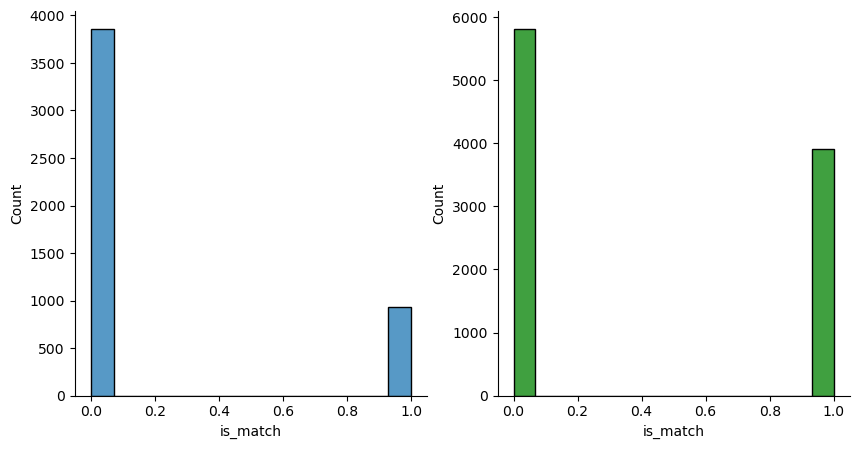

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(control_group)
plt.subplot(1, 2, 2)
sns.histplot(experimental_group, color='green')
sns.despine()

## 3.
Поскольку в наших данных мы будем сравнивать номинативные переменные, для получения статзначимости в разнице наших средних воспользуемся формулой хи квадрат пирсона:

In [9]:
pd.crosstab(dating_df.is_match, dating_df.group)

group,0,1
is_match,,
0,3858,5813
1,934,3909


In [10]:
stat, p, df, expcted = sc.chi2_contingency(pd.crosstab(dating_df.is_match, dating_df.group))

In [11]:
pd.DataFrame(expcted)

,0,1
0,3193.015847,6477.984153
1,1598.984153,3244.015847


In [14]:
print(f'stat value = {stat}, p-value = {p}, degrees of freedom = {df}')

stat value = 618.6889141576197, p-value = 1.441829916366341e-136, degrees of freedom = 1


## Вывод:

1. Благодаря графику и простому получению среднего значения в данных мы увидели, что пропорции в наших группах различаются
2. Для проверки статзначимости нашей гипотезы о разности распределения частот метчей в наших группах мы использовали критерий Хи квадрат Пирсона и получили стат значимые различия, поскольку p-value в нашем случае намного меньше 0.05.
3. Несмотря на то, что метрика `is_match` практически никак не отражает увеличение в прибыли компании и лишь косвенно влияет на нее, то для принятия решения я бы посмотрел дополнительно корреляцию между основной метрикой прибыли и мэтчами. Но если говорить о данной ситуации, то альтернативная гипотеза подтвердилась, а значит **стоит включать новую систему поиска анкет на всех пользователей!**